# UNSUPERVISED LEARNING

#### DATESET LINK :https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [33]:
df2 = pd.read_csv('Mall_Customers.csv')

In [34]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df2.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
df2.shape

(200, 5)

# EDA

In [37]:
#gender distribution 
df2['Gender'].value_counts()/len(df2)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

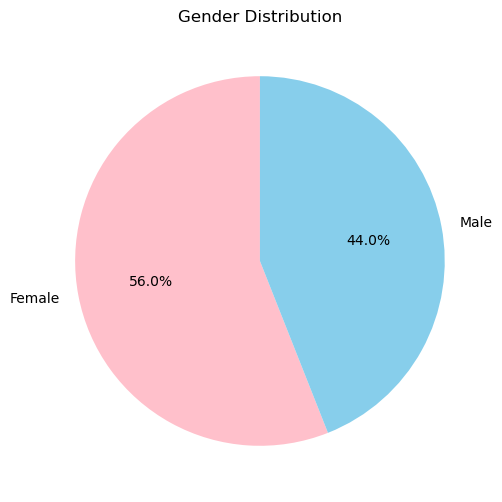

In [38]:
Gender_count=df2['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Gender_count, labels=Gender_count.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
plt.title('Gender Distribution')
plt.show()

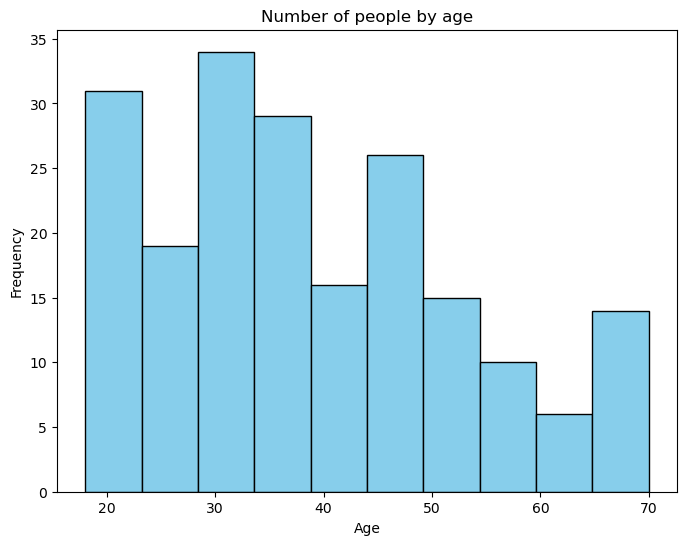

In [39]:
#showing the age distribution 
plt.figure(figsize=(8, 6))
plt.hist(df2['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Number of people by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

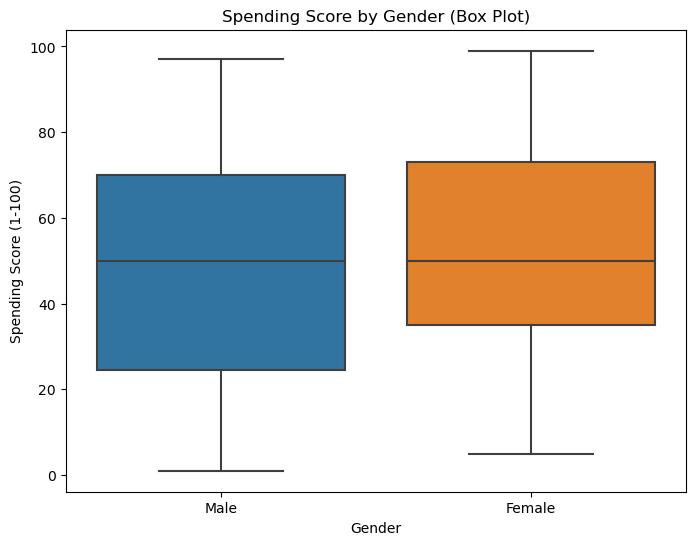

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df2)
plt.title('Spending Score by Gender (Box Plot)')
plt.show()

In [41]:
df2.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

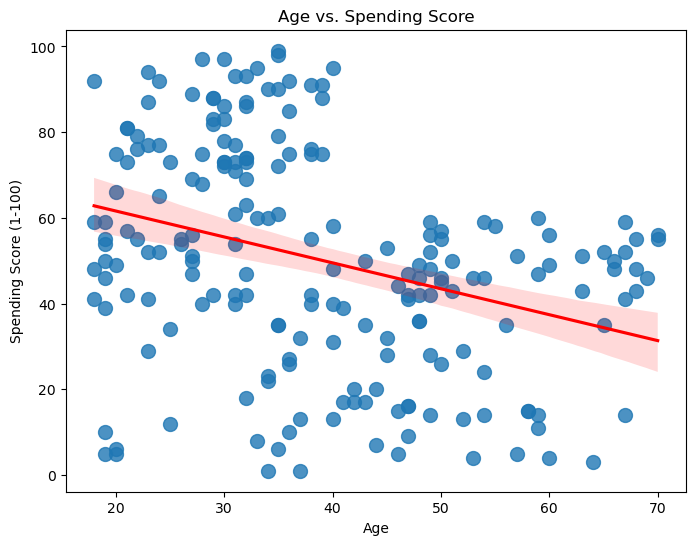

In [42]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Spending Score (1-100)', data=df2, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [43]:
df2['Age'].corr(df2['Spending Score (1-100)'])
#older people tend to spend less in the supermarkets

-0.32722684603909

In [44]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


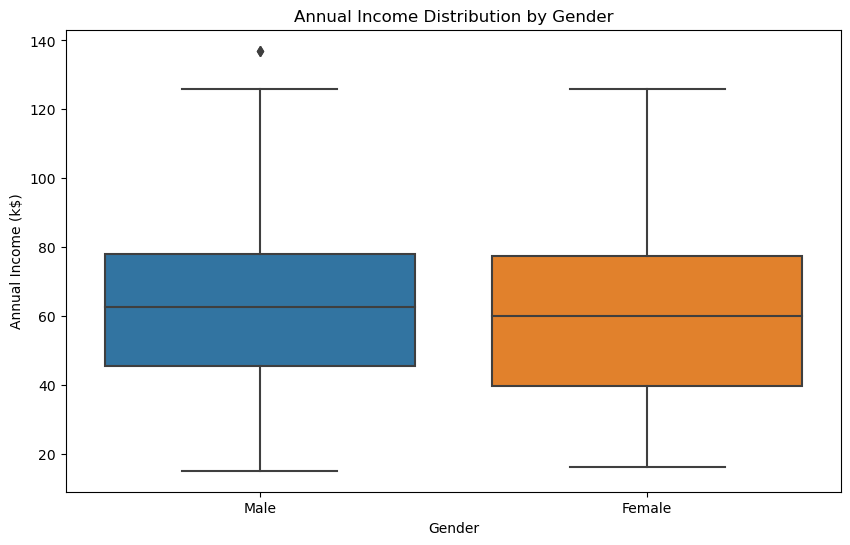

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df2)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

In [46]:
print(df2['Gender'].unique())

['Male' 'Female']


In [47]:
males_incomes = df2[df2['Gender'] == 'Male']['Annual Income (k$)'].mean()
females_incomes = df2[df2['Gender'] == 'Female']['Annual Income (k$)'].mean()

print('The average income of a male is',males_incomes)
print('The average income of a female is', females_incomes)

The average income of a male is 62.22727272727273
The average income of a female is 59.25


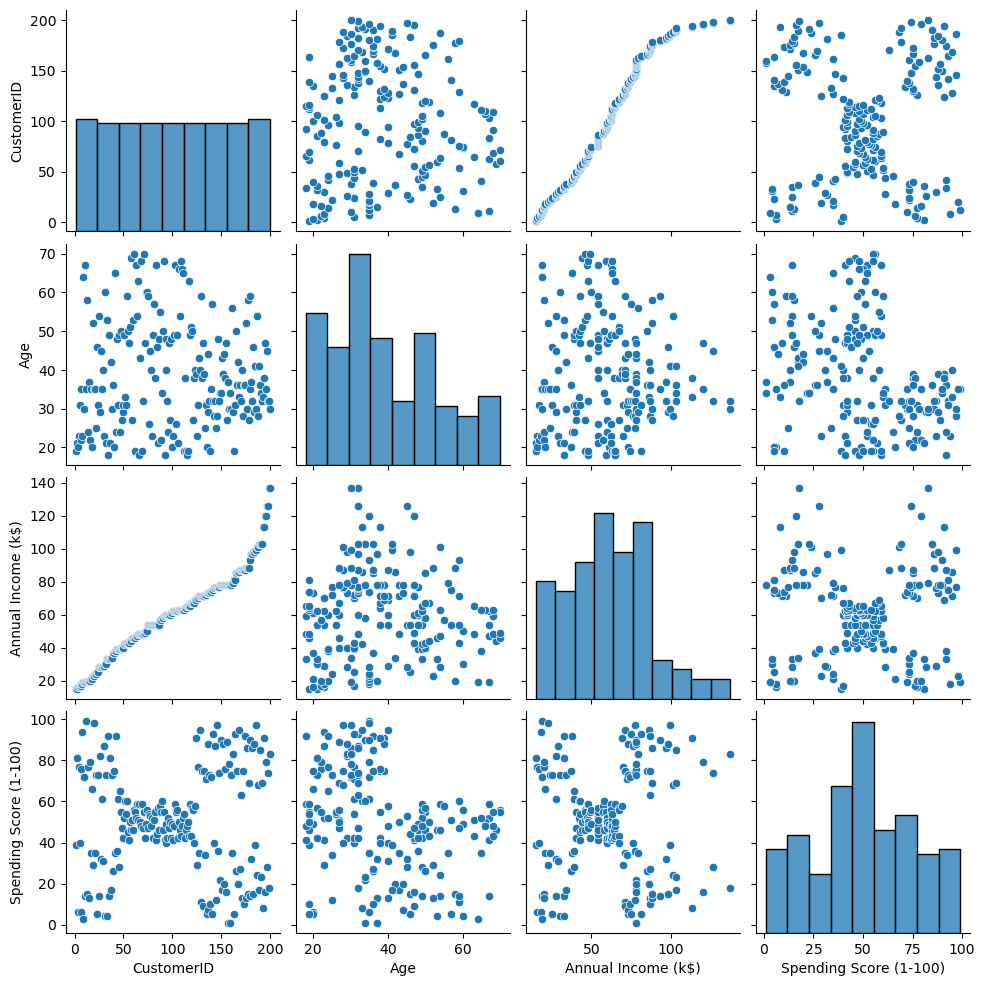

In [48]:
sns.pairplot(df2)
plt.show()

In [49]:
#encoding the gender variable 
label_encoder = LabelEncoder()
df2['Gender']= label_encoder.fit_transform(df2['Gender'])

In [50]:
#K Means clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [51]:
#scaling the data
std_scale = StandardScaler()
df2_scaled = std_scale.fit_transform(df2)

In [52]:
pca = PCA()
df2_pca = pca.fit_transform(df2_scaled)

In [53]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio:
[0.39701894 0.26948765 0.1944746  0.13455007 0.00446875]

Cumulative Explained Variance:
[0.39701894 0.66650659 0.86098119 0.99553125 1.        ]


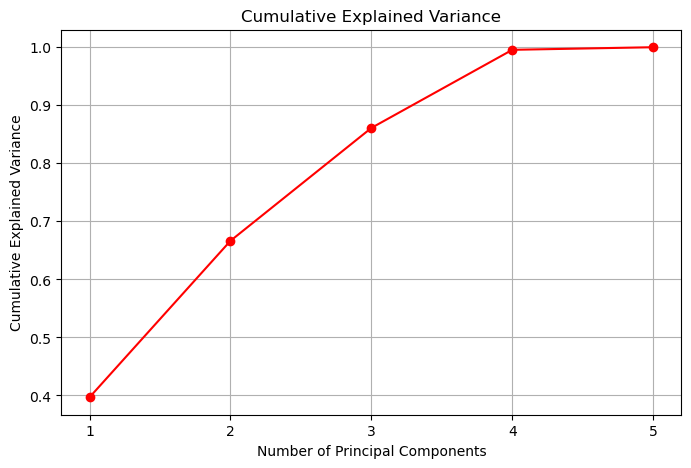

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()
#it is ideal to have 4 principal components 

In [55]:
n_features = pca.n_features_in_
features_names = df2.columns
pc_list = ['PC{}'.format(i) for i in range(1, len(explained_variance_ratio) + 1)]
pc_loadings = dict(zip(pc_list, pca.components_))

loadings_df2 = pd.DataFrame.from_dict(pc_loadings)
loadings_df2['feature'] = features_names
loadings_df2.set_index('feature')

,PC1,PC2,PC3,PC4,PC5
feature,,,,,
CustomerID,0.704584,0.008012,-0.057898,0.001149,-0.707208
Gender,0.078159,0.239203,0.967786,0.007831,0.001360
Age,-0.030668,0.686827,-0.161540,-0.707898,-0.010698
Annual Income (k$),0.704275,0.017315,-0.062068,-0.010230,0.706923
Spending Score (1-100),0.022552,-0.686066,0.173466,-0.706197,-0.000652


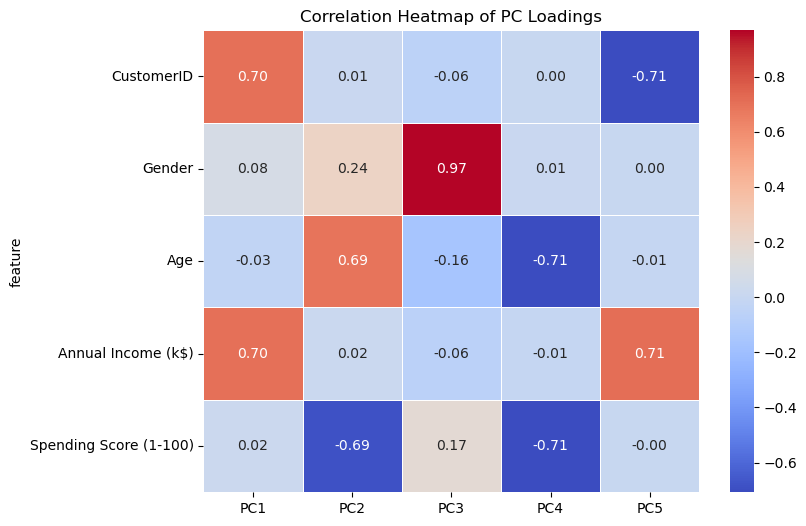

In [56]:
loadings_df2.set_index('feature', inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of PC Loadings')
plt.show()

In [57]:
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [58]:
X1 = df2.drop(['CustomerID','Gender','Annual Income (k$)'],axis=1).values

In [59]:
#to decide the number of clusters
int_list =[]
for i in range(1,10):
        kmeans = KMeans(n_clusters=i,init = "k-means++",n_init = 10 ,max_iter=300,random_state=10)
        kmeans.fit(X1)
        int_list.append(kmeans.inertia_)

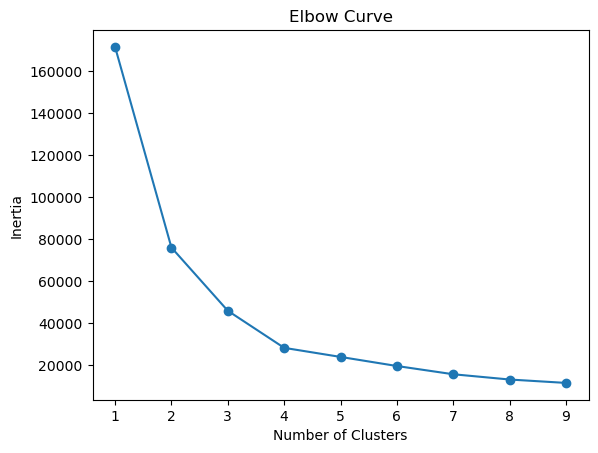

In [60]:
plt.plot(range(1,10), int_list, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
#after about 4 clusters the curve begins to flatten

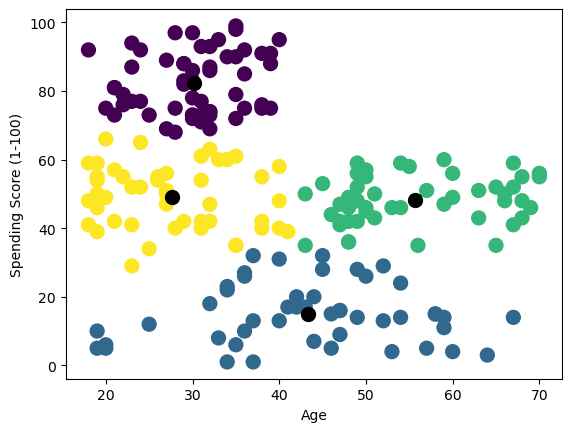

In [61]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 10,algorithm = 'elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df2 , c = labels1 , 
            s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 100 ,c = 'black' )
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Age')
plt.show()

In [62]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [63]:
#segementation using annual income and spending score
X2 = df2[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [64]:
int_list =[]
for i in range(1,10):
        kmeans = KMeans(n_clusters=i,init = "k-means++",n_init = 10 ,max_iter=300,random_state=10)
        kmeans.fit(X2)
        int_list.append(kmeans.inertia_)

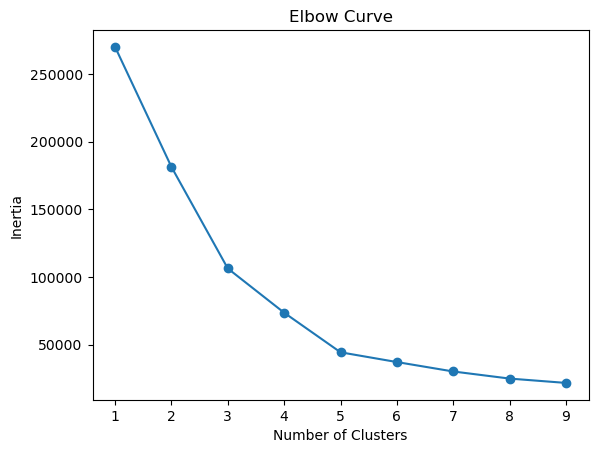

In [65]:
plt.plot(range(1,10), int_list, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
#after about 5 clusters the curve begins to flatten

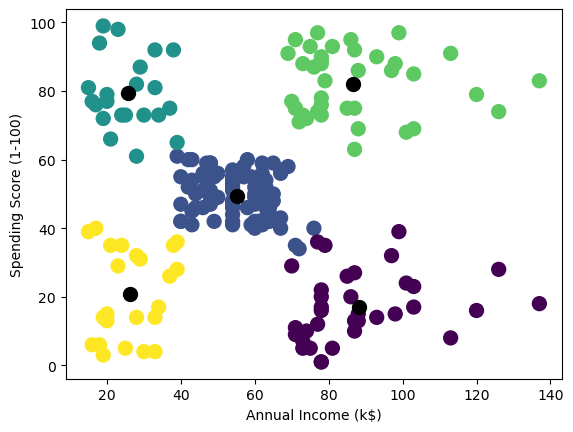

In [66]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 10,algorithm = 'elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df2 , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 100 ,c = 'black' )
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.show()

# REGRESSION

#### DATASET LINK : https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [68]:
df = pd.read_csv("ds_salaries.csv")

In [69]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [71]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [72]:
df['experience_level'] = df['experience_level'].replace({'SE': 'Intermediate', 'MI': 'Junior','EN': 'Entry Level','EX':'Expert'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full Time','PT':'Part Time','CT':'Contract','FL':'Freelance'})

In [73]:
df['experience_level'].value_counts()

Intermediate    280
Junior          213
Entry Level      88
Expert           26
Name: experience_level, dtype: int64

In [74]:
df.shape

(607, 12)

In [75]:
#acccounting for outliers
def outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    df_clean = df[~((df <lb)| (df>ub)).any(axis=1)]
    return df_clean

In [76]:
df_clean = outlier(df.copy())

In [77]:
df = df_clean.reset_index(drop=True)
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Junior,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Junior,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
558,602,2022,Intermediate,Full Time,Data Engineer,154000,USD,154000,US,100,US,M
559,603,2022,Intermediate,Full Time,Data Engineer,126000,USD,126000,US,100,US,M
560,604,2022,Intermediate,Full Time,Data Analyst,129000,USD,129000,US,0,US,M
561,605,2022,Intermediate,Full Time,Data Analyst,150000,USD,150000,US,100,US,M


In [78]:
df.shape

(563, 12)

In [79]:
#44 outliers were removed

# EDA

In [80]:
#growth of different data science jobs 
job_title_counts = df['job_title'].value_counts()
job_title_table = pd.DataFrame({'Job Title': job_title_counts.index, 'Count': job_title_counts.values})
print(job_title_table)

                                   Job Title  Count
0                             Data Scientist    131
1                              Data Engineer    127
2                               Data Analyst     96
3                  Machine Learning Engineer     39
4                         Research Scientist     15
5                             Data Architect     11
6                       Data Science Manager     10
7                 Machine Learning Scientist      8
8                     Data Analytics Manager      7
9                         Lead Data Engineer      6
10                  Director of Data Science      6
11                   Data Science Consultant      6
12                              AI Scientist      6
13                  Computer Vision Engineer      6
14                  Principal Data Scientist      6
15                              Head of Data      5
16                         Big Data Engineer      5
17                  Data Engineering Manager      5
18          

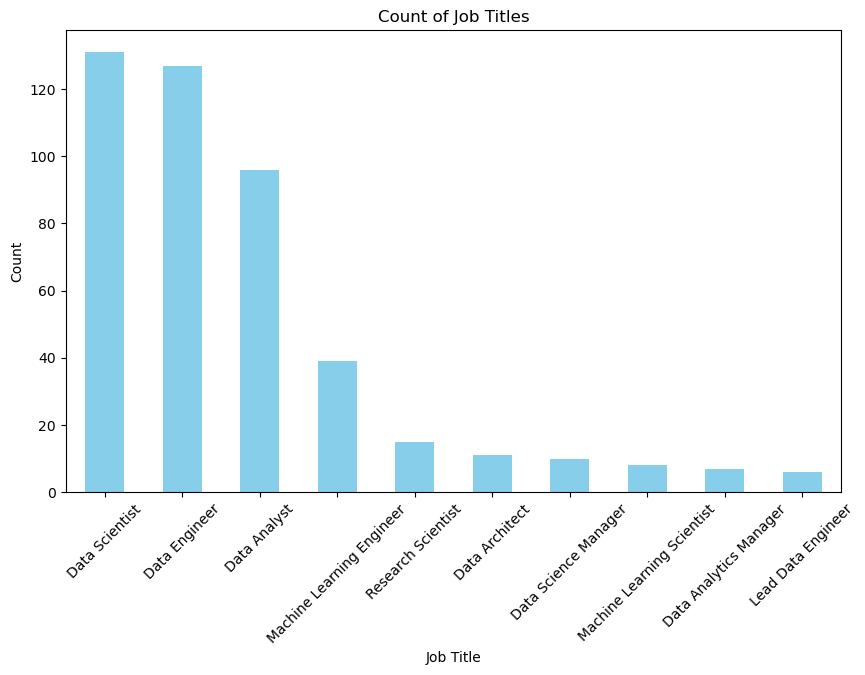

In [81]:
#taking the top 10 data science jobs
plt.figure(figsize=(10, 6))
top_10_jobs = job_title_counts[:10]
top_10_jobs.plot(kind='bar', color='skyblue')
plt.title('Count of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [82]:
avg_salary_of_jobs = df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
avg_salary_of_jobs['salary_in_usd'] = avg_salary_of_jobs['salary_in_usd'].round(2)
avg_salary_of_jobs

,job_title,salary_in_usd
42,Principal Data Engineer,192500.00
43,Principal Data Scientist,181782.83
14,Data Architect,177873.91
19,Data Science Manager,175118.30
1,Analytics Engineer,175000.00
23,Director of Data Science,173419.67
21,Data Specialist,165000.00
27,Head of Data,160162.60
38,Machine Learning Scientist,158412.50
22,Director of Data Engineering,156738.00


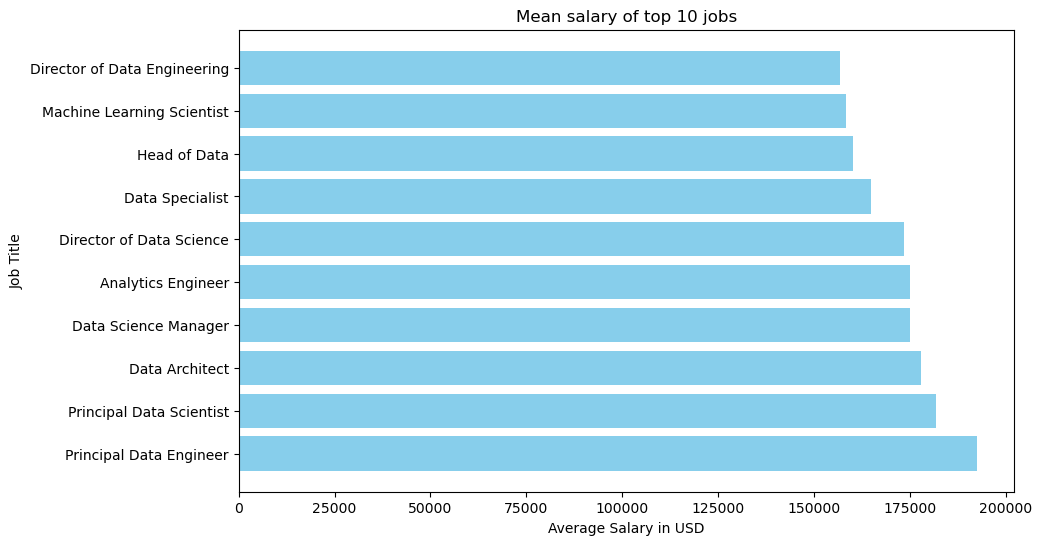

In [83]:
plt.figure(figsize=(10, 6))
avg_salary_of_jobs = avg_salary_of_jobs[:10]
plt.barh(avg_salary_of_jobs['job_title'],avg_salary_of_jobs['salary_in_usd'], color='skyblue')
plt.title('Mean salary of top 10 jobs')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

In [84]:
df['work_year'].value_counts()

2022    311
2021    190
2020     62
Name: work_year, dtype: int64

In [85]:
df.shape

(563, 12)

In [86]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          563 non-null    int64 
 1   work_year           563 non-null    int64 
 2   experience_level    563 non-null    object
 3   employment_type     563 non-null    object
 4   job_title           563 non-null    object
 5   salary              563 non-null    int64 
 6   salary_currency     563 non-null    object
 7   salary_in_usd       563 non-null    int64 
 8   employee_residence  563 non-null    object
 9   remote_ratio        563 non-null    int64 
 10  company_location    563 non-null    object
 11  company_size        563 non-null    object
dtypes: int64(5), object(7)
memory usage: 52.9+ KB


In [88]:
df['company_size'].value_counts()

M    317
L    173
S     73
Name: company_size, dtype: int64

In [89]:
#renaming company size column 
df['company_size'] = df['company_size'].replace({'L': 'Large', 'M': 'Medium','S':'Small'})

In [90]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Junior,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Junior,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


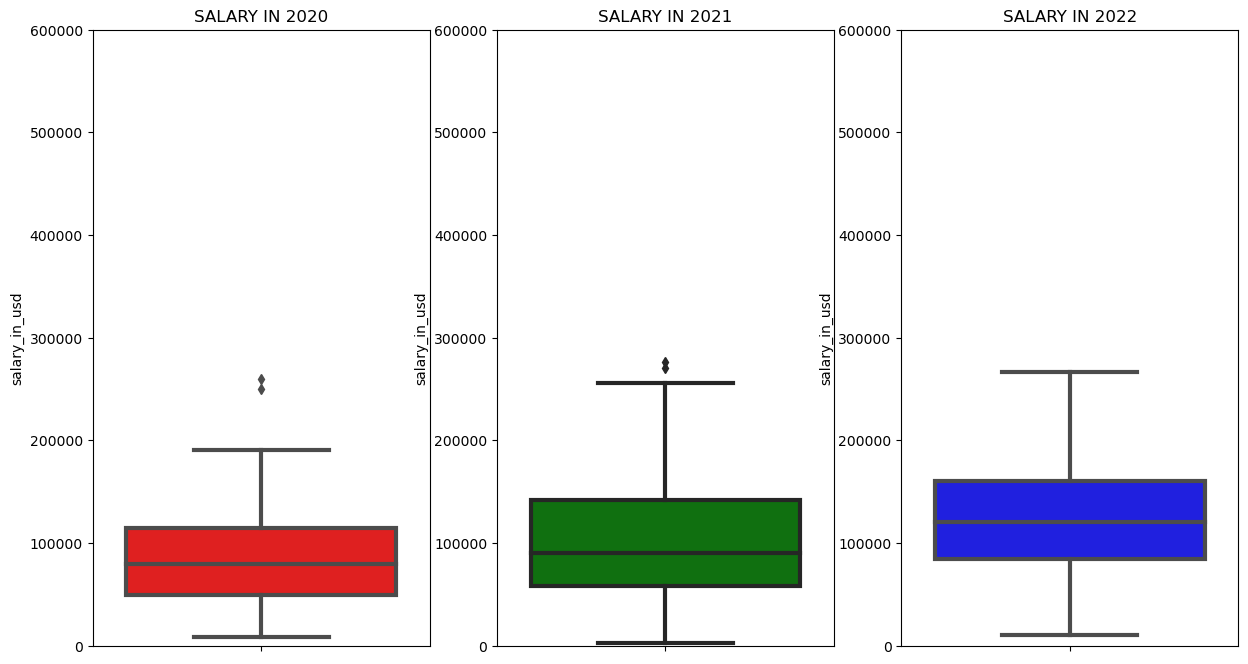

In [91]:
#has there been a spike in salaries of data science jobs over the past 3 years?
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('SALARY IN 2020')
sns.boxplot(y='salary_in_usd',data=df[df['work_year'] == 2020],color='red',linewidth=3)
plt.ylim(0, 600000)
plt.subplot(1, 4, 2)
plt.title('SALARY IN 2021')
sns.boxplot(y='salary_in_usd',data=df[df['work_year'] == 2021],color='green',linewidth=3)
plt.ylim(0, 600000)
plt.subplot(1, 4, 3)
plt.title('SALARY IN 2022')
sns.boxplot(y='salary_in_usd',data=df[df['work_year'] == 2022],color='blue',linewidth=3)
plt.ylim(0, 600000)
plt.show()


In [92]:
mean_salary_by_year=df.groupby('work_year')['salary_in_usd'].mean().reset_index().round(2)
print(mean_salary_by_year)

   work_year  salary_in_usd
0       2020       89391.44
1       2021      100095.27
2       2022      123284.44


In [93]:
mean_salary_by_year['percentage_increase'] = mean_salary_by_year['salary_in_usd'].pct_change() * 100
print(mean_salary_by_year)
#we can see an pecerntage increase of 12 % from 2020 to 2021 and then 23% from 2021 to 2022 showing that data science jobs are getting much better paid.

   work_year  salary_in_usd  percentage_increase
0       2020       89391.44                  NaN
1       2021      100095.27            11.974111
2       2022      123284.44            23.167099


In [94]:
#does working remotely have an impact on salaries
df['remote_ratio'].value_counts()/len(df)*100

100    63.765542
0      20.959147
50     15.275311
Name: remote_ratio, dtype: float64

In [95]:
#renaming column names
df['remote_ratio'] = df['remote_ratio'].replace({0: 'None', 50: 'Partially Remote',100: 'Fully Remote'})


In [96]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Junior,Full Time,Data Scientist,70000,EUR,79833,DE,None,DE,Large
1,1,2020,Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,None,JP,Small
2,2,2020,Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,Medium
3,3,2020,Junior,Full Time,Product Data Analyst,20000,USD,20000,HN,None,HN,Small
4,4,2020,Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,Large


In [97]:
df.groupby('remote_ratio',as_index=False)['salary_in_usd'].mean().sort_values('salary_in_usd',ascending=False)

,remote_ratio,salary_in_usd
0,Fully Remote,119856.128134
1,None,108804.584746
2,Partially Remote,81796.965116


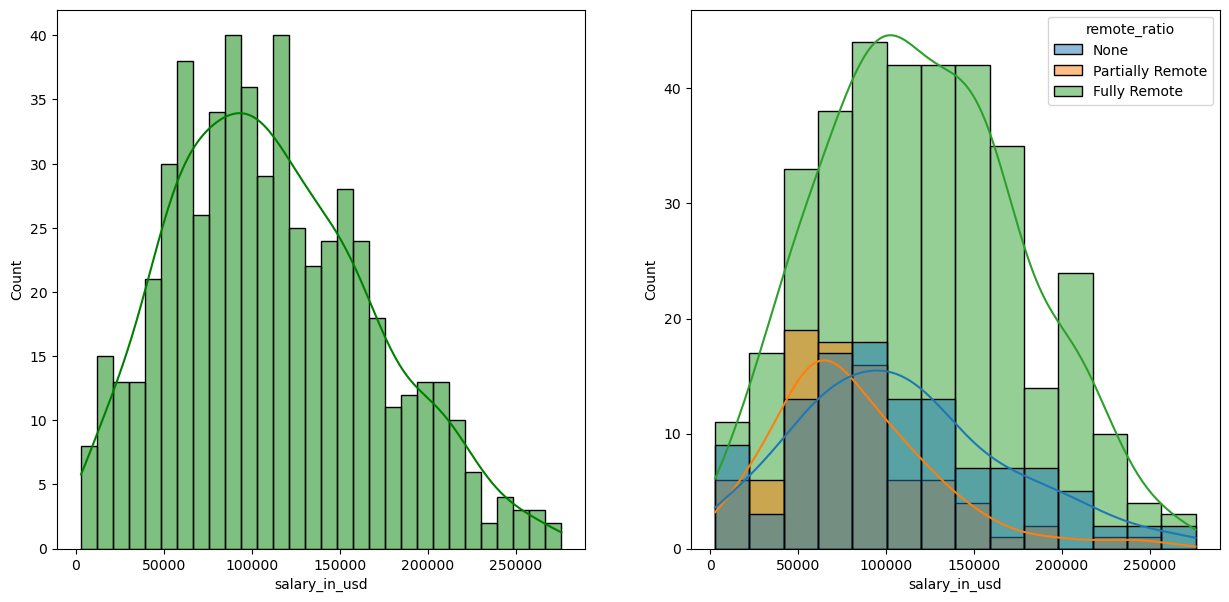

In [98]:
#plotting a kernel density plot to show this
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='salary_in_usd',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='salary_in_usd',kde=True,hue='remote_ratio')
plt.show()
#it is clear that remote working seems to have better salaries

In [99]:
df['company_location'].value_counts().head(5)

US    342
GB     47
CA     30
DE     28
FR     15
Name: company_location, dtype: int64

In [101]:
#does the company location have an impact on salaries for data science jobs?
df['company_location']=df['company_location'].replace({'US':'United States', 'GB': 'United Kingdom' , 'CA':'Canada','DE': 'Germany','FR':'France'})

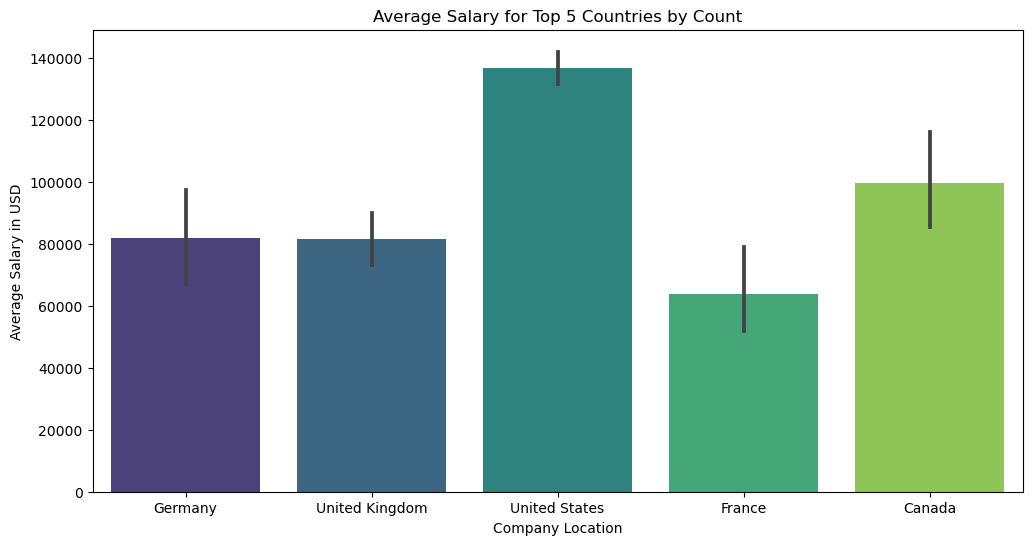

In [102]:
#taking top 5 countries for analysis
top_5_countries = df['company_location'].value_counts().head(5).index
df_top_5_countries = df[df['company_location'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_5_countries, x='company_location', y='salary_in_usd', palette='viridis')
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary for Top 5 Countries by Count')
plt.show()
#it is evident that United states provides the highest salary whereas 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          563 non-null    int64 
 1   work_year           563 non-null    int64 
 2   experience_level    563 non-null    object
 3   employment_type     563 non-null    object
 4   job_title           563 non-null    object
 5   salary              563 non-null    int64 
 6   salary_currency     563 non-null    object
 7   salary_in_usd       563 non-null    int64 
 8   employee_residence  563 non-null    object
 9   remote_ratio        563 non-null    object
 10  company_location    563 non-null    object
 11  company_size        563 non-null    object
dtypes: int64(4), object(8)
memory usage: 52.9+ KB


In [105]:
#simplifying the job titles 
categories = {
    "Data Analytics": ["Data Analytics Lead","Principal Data Analyst","Product Data Analyst","Lead Data Analyst","Marketing Data Analyst", "Analytics Engineer","Financial Data Analyst", "Data Analytics Manager", "Data Analyst", "Business Data Analyst", "BI Data Analyst", "Data Analytics Engineer", "Finance Data Analyst"],
    "Data Engineering": ["Principal Data Engineer","Lead Data Engineer", "Director of Data Engineering","Data Engineer", "Cloud Data Engineer", "Data Engineering Manager", "Big Data Engineer", "ETL Developer"],
    "Data Science": ["Principal Data Scientist","Data Science Consultant", "Director of Data Science", "Data Science Engineer","Head of Data Science", "Applied Data Scientist", "Data Scientist", "Data Science Manager", "Staff Data Scientist", "Research Scientist"],
    "Machine Learning": ["Machine Learning Scientist", "Applied Machine Learning Scientist", "Machine Learning Manager", "Lead Machine Learning Engineer", "Machine Learning Engineer", "Machine Learning Infrastructure Engineer", "ML Engineer", "Machine Learning Developer", "Head of Machine Learning"],
    "Computer Vision": ["Computer Vision Software Engineer", "Computer Vision Engineer", "3D Computer Vision Researcher"],
 "Other": ["Data Architect",  "Data Specialist", "Head of Data" , "AI Scientist","NLP Engineer"] 
}
def categorize_job_title(job_title):
    for category, titles in categories.items():
        for title in titles:
            if title.lower() in job_title.lower():
                return category
    return "Other"  


df['Category'] = df['job_title'].apply(categorize_job_title)
print(df[['job_title', 'Category']])

                      job_title          Category
0                Data Scientist      Data Science
1    Machine Learning Scientist  Machine Learning
2             Big Data Engineer  Data Engineering
3          Product Data Analyst    Data Analytics
4     Machine Learning Engineer  Machine Learning
..                          ...               ...
558               Data Engineer  Data Engineering
559               Data Engineer  Data Engineering
560                Data Analyst    Data Analytics
561                Data Analyst    Data Analytics
562                AI Scientist             Other

[563 rows x 2 columns]


In [106]:
df['Category'].value_counts()

Data Science        188
Data Engineering    151
Data Analytics      128
Machine Learning     62
Other                25
Computer Vision       9
Name: Category, dtype: int64

In [107]:
#converting catergorical to numerical variables
label_encoder = LabelEncoder()
df['experience_level']= label_encoder.fit_transform(df['experience_level'])
df['employment_type']= label_encoder.fit_transform(df['employment_type'])
df['job_title']= label_encoder.fit_transform(df['job_title'])
df['Category']= label_encoder.fit_transform(df['Category'])
df['employee_residence']= label_encoder.fit_transform(df['employee_residence'])
df['remote_ratio']= label_encoder.fit_transform(df['remote_ratio'])
df['company_location']= label_encoder.fit_transform(df['company_location'])
df['company_size']= label_encoder.fit_transform(df['company_size'])

In [108]:
df = df.drop('Unnamed: 0', axis=1)

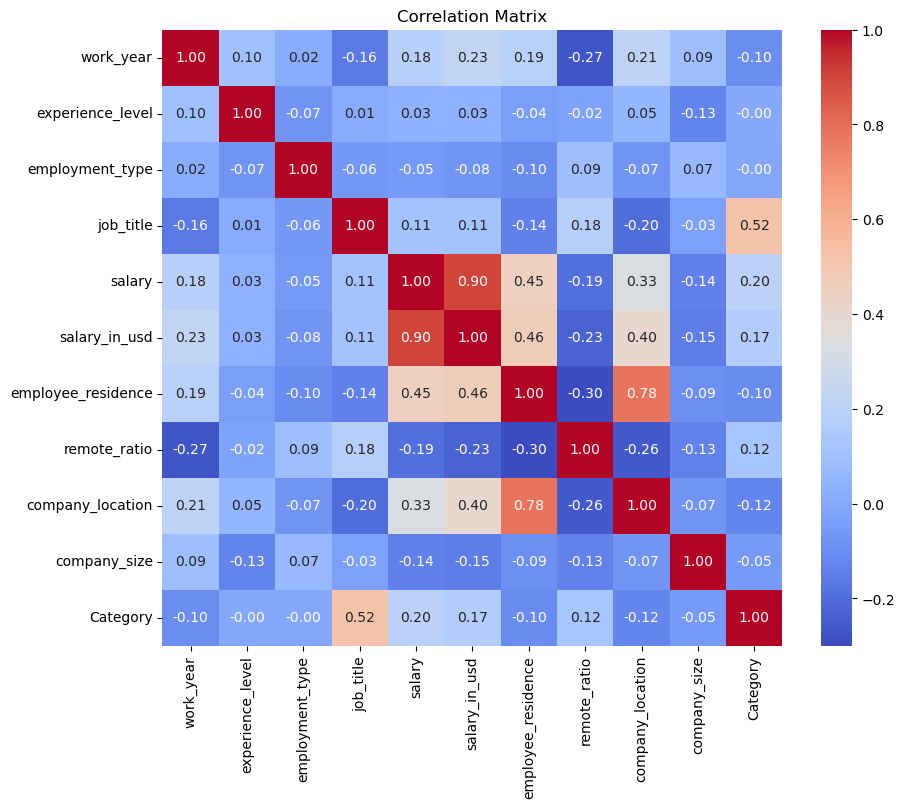

In [109]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("C:/Users/ACER/Machine learning/Coursework/HeatMapReg.png",bbox_inches='tight')
plt.show()

In [110]:
x = df.drop(labels = ['salary_in_usd', 'salary_currency', 'salary','work_year','job_title'],axis=1)
y = df[['salary_in_usd']]

In [111]:
#scaling the variables
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [113]:

model = {
    'Linear Regression' : LinearRegression(),
     'Random Forest Regression':RandomForestRegressor(),
     'XGBoost Regression' : XGBRegressor(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Gradient Boosting Regression' : GradientBoostingRegressor()
}


In [114]:
rmse_scores = {}


for name, i in model.items():
  

    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores[name] = {'RMSE': rmse, 'R2': r2}
    rmse_scores = dict(sorted(rmse_scores.items(), key=lambda item: item[1]['RMSE'], reverse=False))

for name, rmse in rmse_scores.items():
    print(f"{name}: RMSE = {rmse['RMSE']:.4f},R2 = {rmse['R2']:.4f}")

Gradient Boosting Regression: RMSE = 39498.6675,R2 = 0.5532
Random Forest Regression: RMSE = 42866.2820,R2 = 0.4738
XGBoost Regression: RMSE = 42954.6081,R2 = 0.4716
Linear Regression: RMSE = 48582.9273,R2 = 0.3241
Lasso Regression: RMSE = 48583.1699,R2 = 0.3241
Ridge Regression: RMSE = 48586.6799,R2 = 0.3240


In [115]:
# taking top 3 modelsconducting hyperparamter tuning
from sklearn.model_selection import GridSearchCV

In [116]:
xgb = XGBRegressor(random_state=42)
params = {
    'max_depth' : (3, 6, 9),
    'learning_rate' : (0.3, 0.1, 0.05),
    'n_estimators' : (50, 100, 200)
}

mod1 = GridSearchCV(xgb, params, cv=10)
mod1.fit(x_train, y_train)
print('Best hyperparameter : ', mod1.best_params_)

Best hyperparameter :  {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}


In [117]:
y_pred = mod1.predict(x_train)
print(f'Train RMSE : {mean_squared_error(y_train, y_pred, squared=False)}, Train R2  : {r2_score(y_train,y_pred):.4f}')

Train RMSE : 29553.253032844066, Train R2  : 0.7222


In [118]:
rfr = RandomForestRegressor(random_state=12)
params = {
    'max_depth' : (3, 6, 9),
    'n_estimators' : (50, 100, 200),
     'min_samples_split': (2, 5, 10),
    'min_samples_leaf': (1, 2, 4)
}

mod2 = GridSearchCV(rfr, params, cv=10)
mod2.fit(x_train, y_train)
print('Best hyperparameter : ', mod2.best_params_)

Best hyperparameter :  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [119]:
y_pred = mod2.predict(x_train)
print(f'Train RMSE : {mean_squared_error(y_train, y_pred, squared=False)}, Train R2  : {r2_score(y_train,y_pred):.4f}')

Train RMSE : 30536.400824169, Train R2  : 0.7034


In [120]:
gb = GradientBoostingRegressor(random_state=42)
params = {
    'loss' : ('squared_error', 'absolute_error'),
    'learning_rate' : (1.0, 0.1, 0.01),
    'n_estimators' : (50, 100, 200)
}

mod3 = GridSearchCV(gb, params, cv=10)
mod3.fit(x_train, y_train)
print('Best hyperparameter : ', mod3.best_params_)

Best hyperparameter :  {'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 100}


In [121]:
y_pred = mod3.predict(x_train)
print(f'Train RMSE : {mean_squared_error(y_train, y_pred, squared=False)}, Train R2  : {r2_score(y_train,y_pred):.4f}')

Train RMSE : 30641.412065095796, Train R2  : 0.7013


# CLASSFICATION

#### DATASET LINK : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score

In [123]:
df1 = pd.read_csv("StudentsPerformance.csv")

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [125]:
df1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [126]:
#checking for null values 
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [127]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## EDA

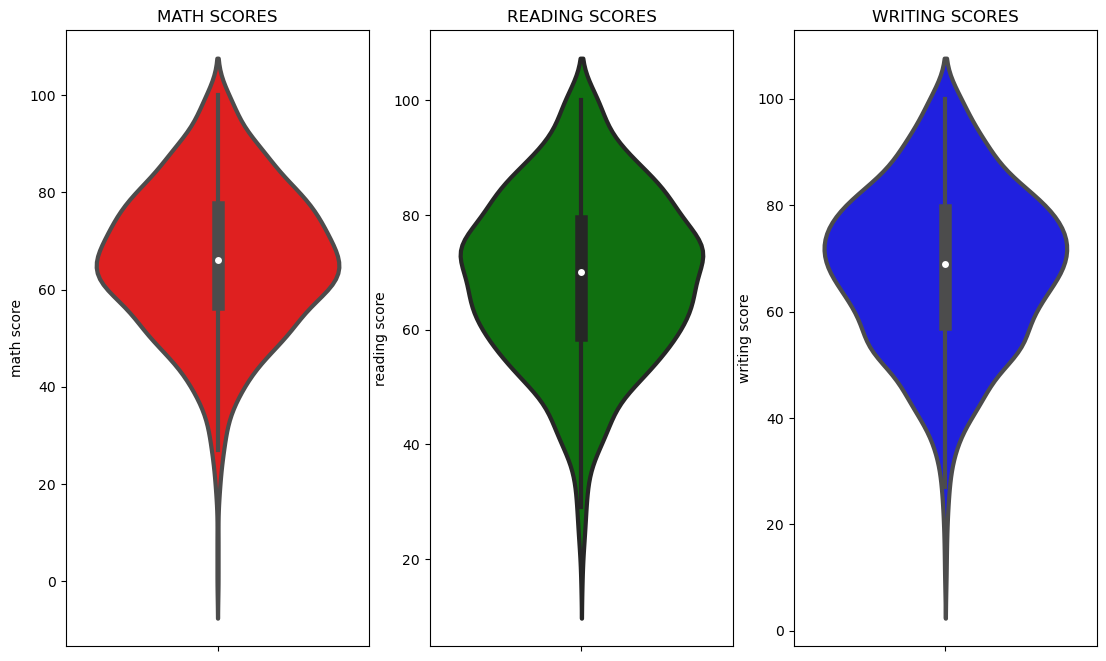

In [128]:
#lets analyze each test score indiviudally first
# Create box plots for each score
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df1,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df1,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df1,color='blue',linewidth=3)
plt.show()


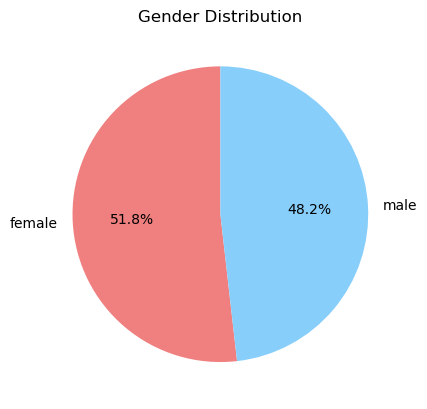

In [129]:
#gender distribution 
gender_counts = df1['gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
ax.set_title('Gender Distribution')
plt.show()

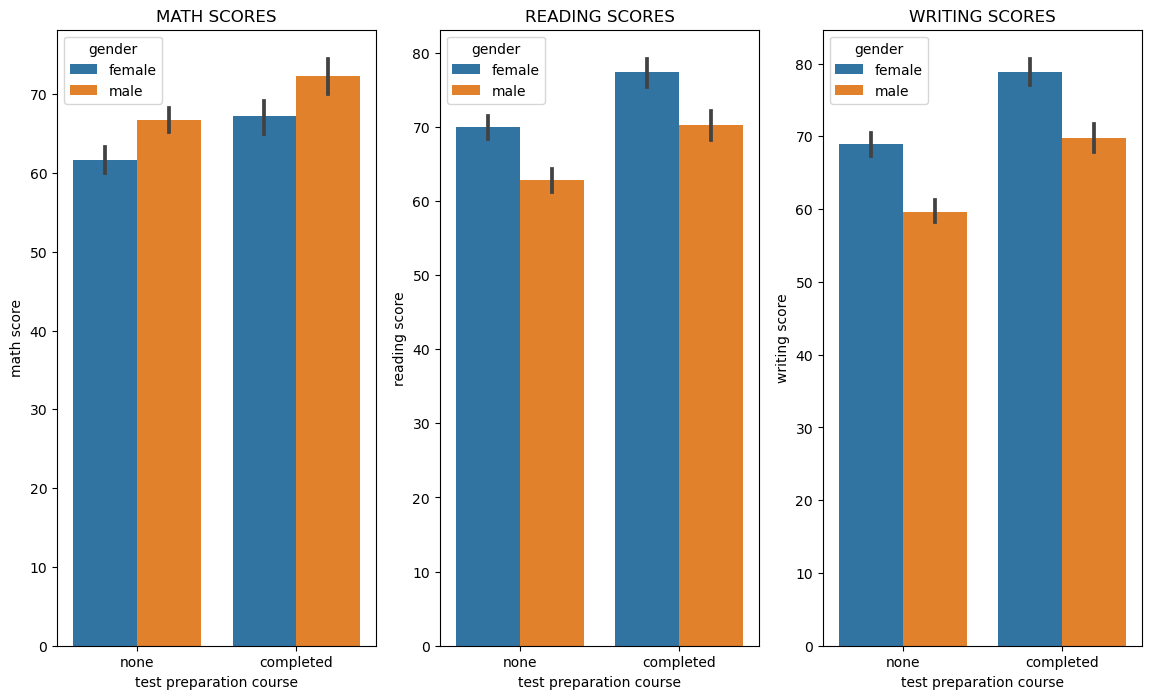

In [130]:
#checking for marks according to test preparation course taken 
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',hue= 'gender',data=df1)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',hue='gender',data=df1)
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',hue='gender',data=df1)
plt.title('WRITING SCORES')
plt.show()

In [131]:
df1['Tot score'] = df1['math score']+ df1['reading score']+df1['writing score']
df1['Avg score'] = df1['Tot score']/3
df1['Avg score']=df1['Avg score'].round(2)

In [132]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tot score,Avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [133]:
#assuming a pass mark of 60
df1['Grade']= df1['Avg score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

In [134]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tot score,Avg score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,Fail
4,male,group C,some college,standard,none,76,78,75,229,76.33,Pass


In [135]:
df1['Grade'].value_counts()

Pass    715
Fail    285
Name: Grade, dtype: int64

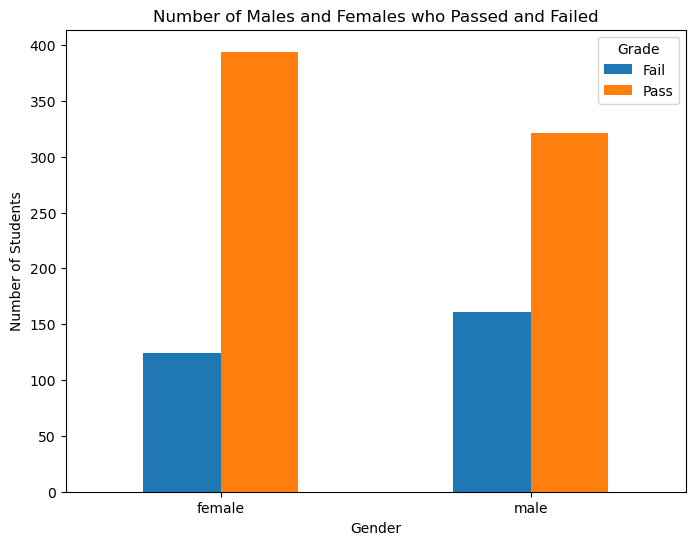

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))


df1.groupby(['gender', 'Grade']).size().unstack().plot(kind='bar', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Students')
ax.set_title('Number of Males and Females who Passed and Failed')
plt.xticks(rotation=0)
plt.show()

In [137]:
proportions = df1.groupby(['gender', 'Grade']).size() / df1.groupby('gender').size()
print(proportions)
#the pass rate of females tend to be higher than the pass rates of males

gender  Grade
female  Fail     0.239382
        Pass     0.760618
male    Fail     0.334025
        Pass     0.665975
dtype: float64


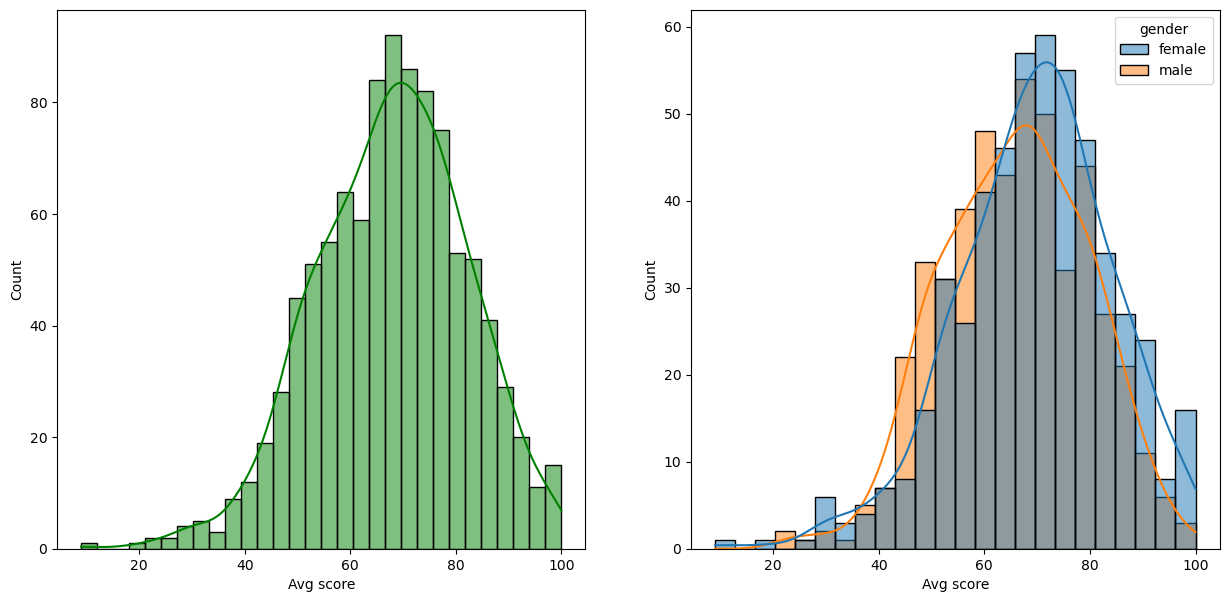

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Avg score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='Avg score',kde=True,hue='gender')
plt.show()
#its proven females tend to score higher marks than males.

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

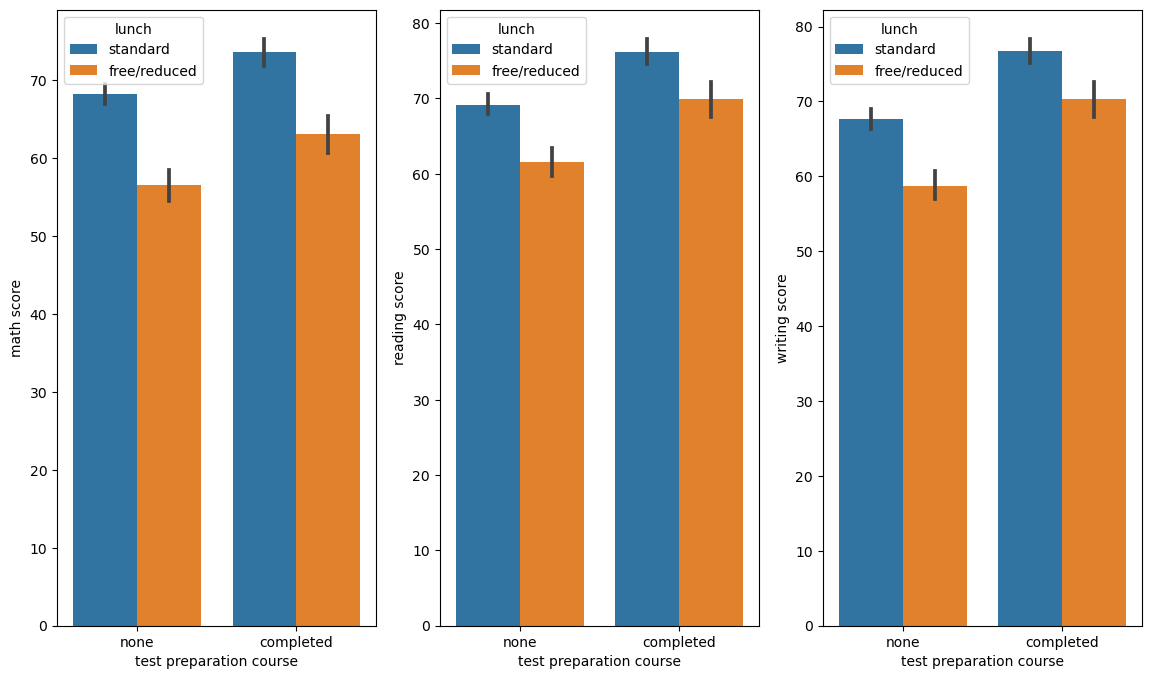

In [139]:
#standard lunch helps perform better in exams
plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
sns.barplot (x=df1['test preparation course'], y=df1['math score'], hue=df1['lunch'])
plt.subplot(1,3,2)
sns.barplot (x=df1['test preparation course'], y=df1['reading score'], hue=df1['lunch'])
plt.subplot(1,3,3)
sns.barplot (x=df1['test preparation course'], y=df1['writing score'], hue=df1['lunch'])
#all cases standard lunch has a higher marks 

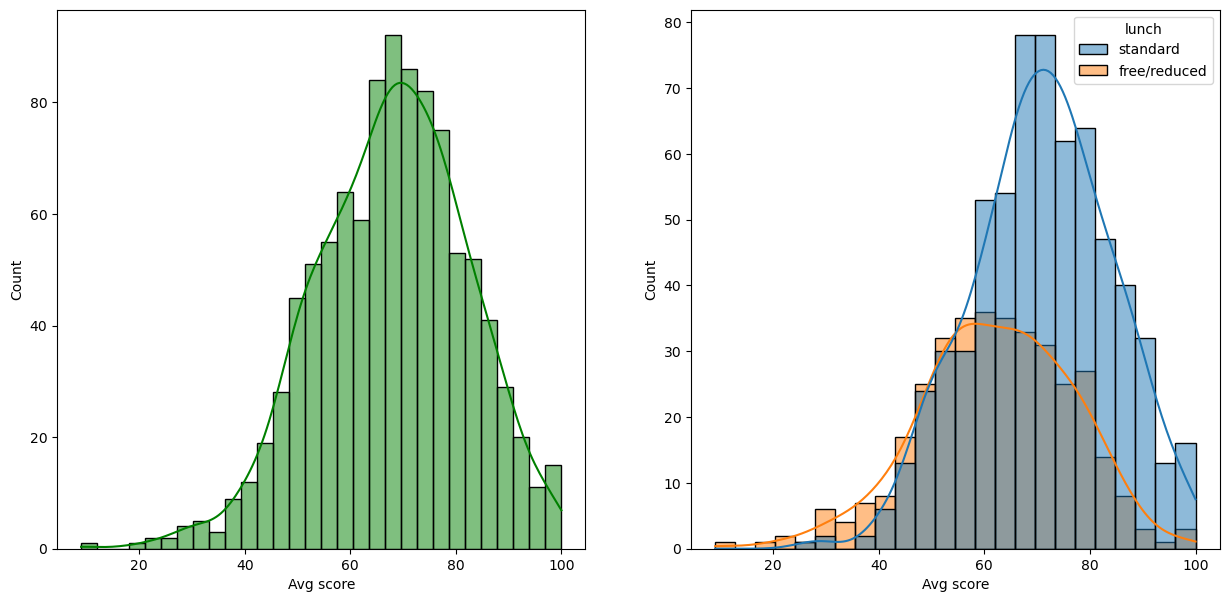

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Avg score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='Avg score',kde=True,hue='lunch')
plt.show()
#it is evident that standard lunch does infact improve grades

In [141]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tot score,Avg score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,Fail
4,male,group C,some college,standard,none,76,78,75,229,76.33,Pass


In [142]:
df1.groupby(['lunch','Grade']).size()/df1.groupby('lunch').size()

lunch         Grade
free/reduced  Fail     0.43662
              Pass     0.56338
standard      Fail     0.20155
              Pass     0.79845
dtype: float64

In [143]:
df1['race/ethnicity'].value_counts().sort_values(ascending=False)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

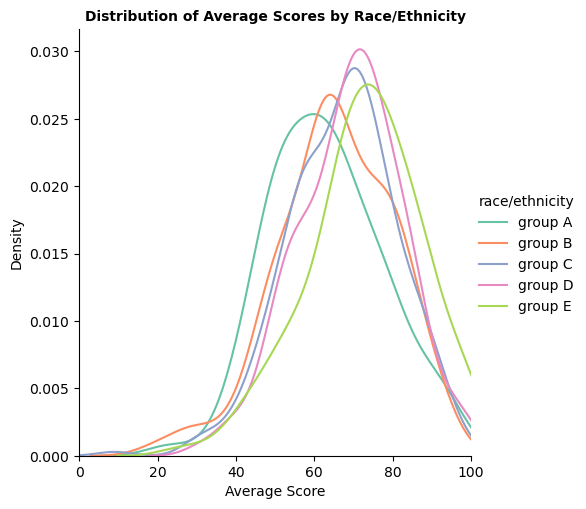

In [144]:
ethnicity_order = sorted(df1['race/ethnicity'].unique())
(sns.FacetGrid(df1, hue="race/ethnicity",hue_order=ethnicity_order, height=5, xlim=(0, 100), palette="Set2")
     .map(sns.kdeplot, "Avg score")
     .add_legend())
plt.title('Distribution of Average Scores by Race/Ethnicity', fontsize=10, fontweight='bold')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.show()
#performance of group E is the best among of other races

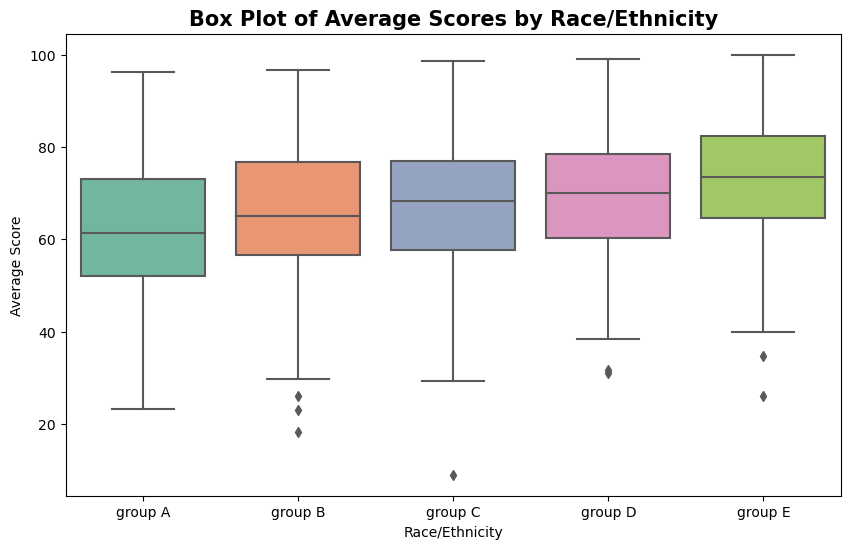

In [145]:
plt.figure(figsize=(10, 6))
df1['race/ethnicity'] = pd.Categorical(df1['race/ethnicity'], categories=sorted(df1['race/ethnicity'].unique()))

sns.boxplot(x="race/ethnicity", y="Avg score", data=df1, palette="Set2")
plt.title('Box Plot of Average Scores by Race/Ethnicity', fontsize=15, fontweight='bold')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.show()

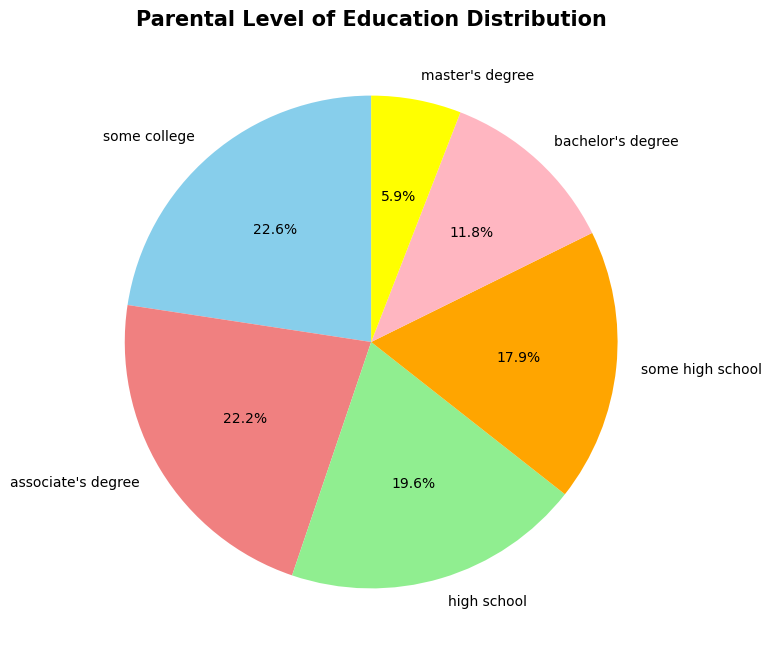

In [146]:
#parental level of education
parent_education_counts = df1['parental level of education'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(parent_education_counts, labels=parent_education_counts.index,autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'yellow'])
plt.title('Parental Level of Education Distribution', fontsize=15, fontweight='bold')
plt.show()

<AxesSubplot:title={'center':"PARENTS LEVEL OF EDUCATION vs CHILDREN's Avg Score"}, xlabel='parental level of education', ylabel='Avg score'>

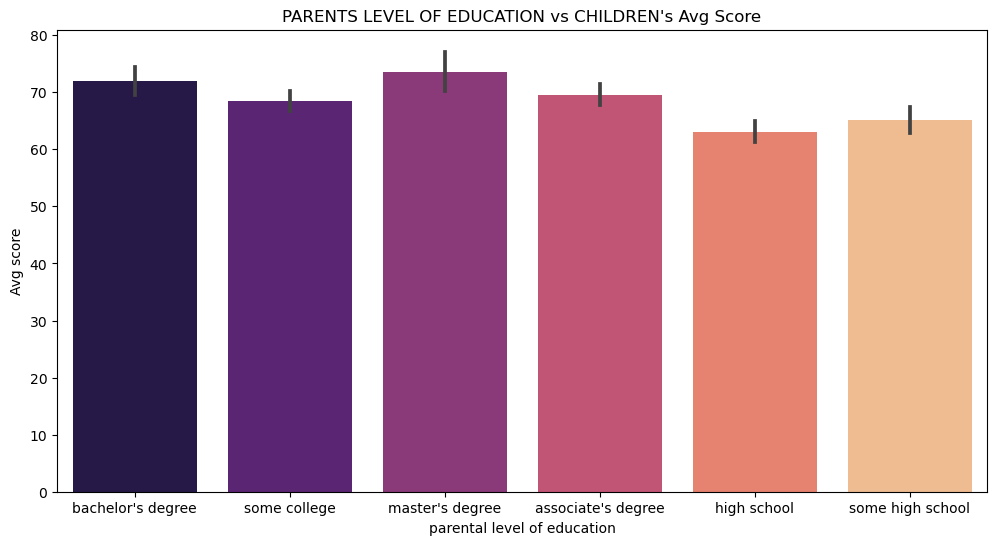

In [147]:
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s Avg Score')
sns.barplot(x=df1['parental level of education'],y=df1['Avg score'],data=df1,palette='magma')


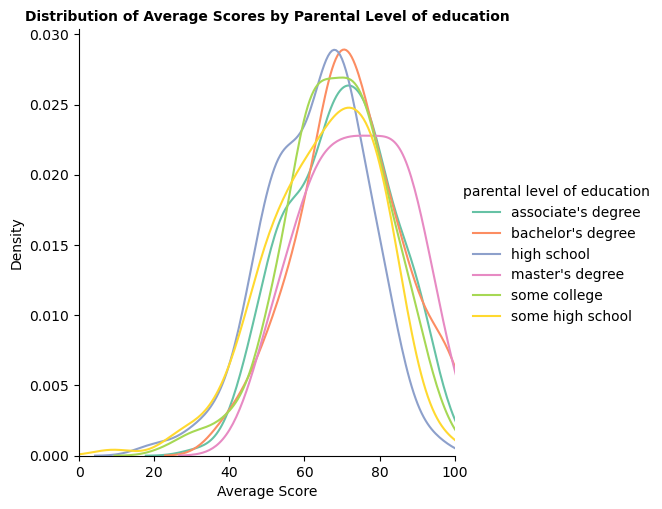

In [148]:
parent_order = sorted(df1['parental level of education'].unique())
(sns.FacetGrid(df1, hue="parental level of education",hue_order=parent_order, height=5, xlim=(0, 100), palette="Set2")
     .map(sns.kdeplot, "Avg score")
     .add_legend())
plt.title('Distribution of Average Scores by Parental Level of education', fontsize=10, fontweight='bold')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.show()

In [149]:
print(df1.groupby(['parental level of education','Grade']).size()/df1.groupby('parental level of education').size())

parental level of education  Grade
associate's degree           Fail     0.265766
                             Pass     0.734234
bachelor's degree            Fail     0.177966
                             Pass     0.822034
high school                  Fail     0.387755
                             Pass     0.612245
master's degree              Fail     0.169492
                             Pass     0.830508
some college                 Fail     0.243363
                             Pass     0.756637
some high school             Fail     0.357542
                             Pass     0.642458
dtype: float64


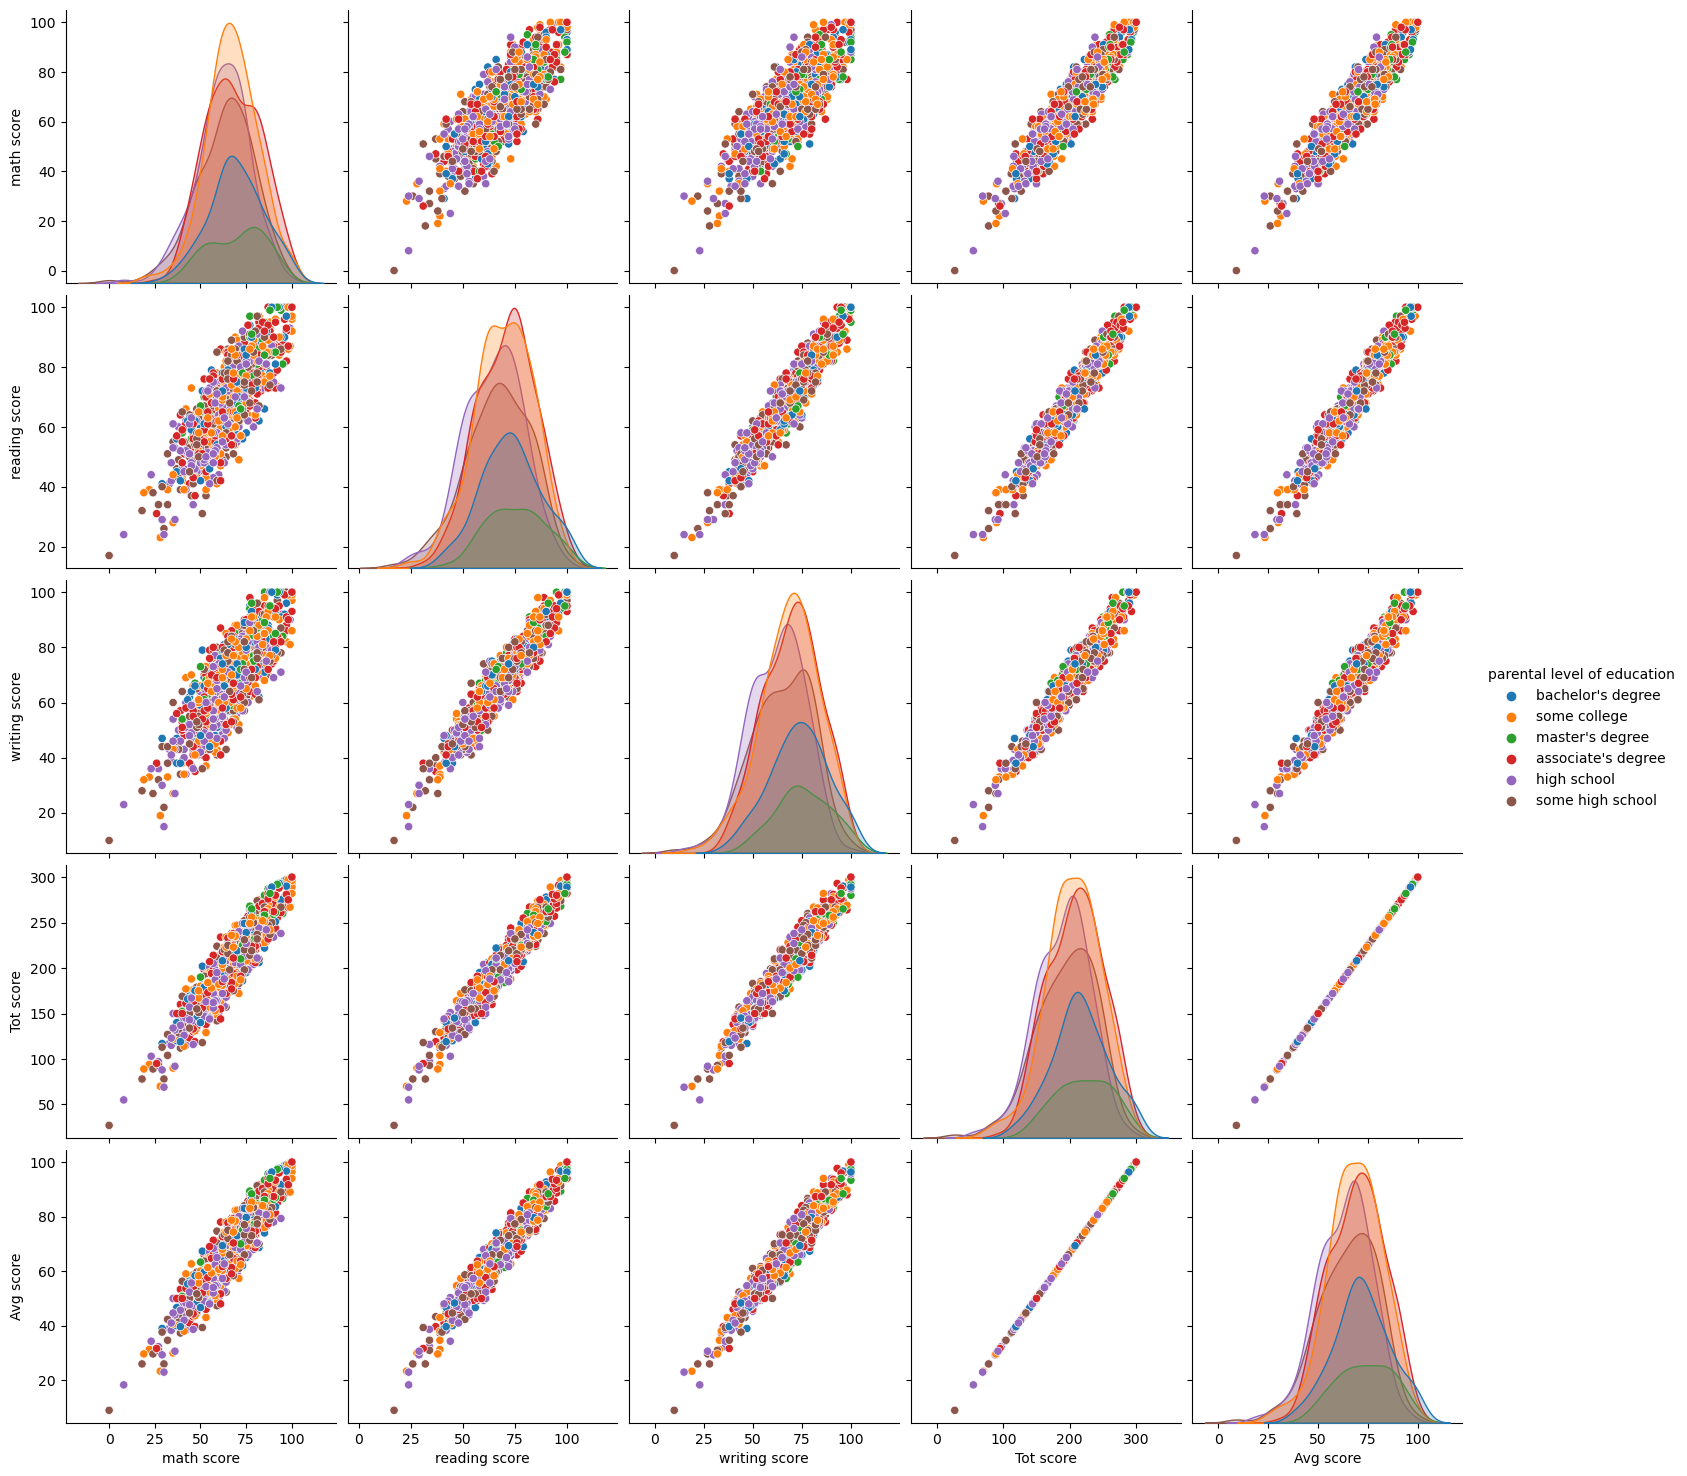

In [150]:
sns.pairplot(df1, hue='parental level of education', height=3)
plt.show()


In [151]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tot score,Avg score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,Fail
4,male,group C,some college,standard,none,76,78,75,229,76.33,Pass


In [152]:
#encoding the categorical varaibles 
from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    df1[x] = le.fit_transform(df1[x])

In [153]:
label_list = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]

for i in label_list:
    label_encoder(i)

In [154]:
df1['Grade'] = df1['Grade'].map({'Fail': 0, 'Pass': 1})

In [155]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tot score,Avg score,Grade
0,0,1,1,1,1,72,72,74,218,72.67,1
1,0,2,4,1,0,69,90,88,247,82.33,1
2,0,1,3,1,1,90,95,93,278,92.67,1
3,1,0,0,0,1,47,57,44,148,49.33,0
4,1,2,4,1,1,76,78,75,229,76.33,1


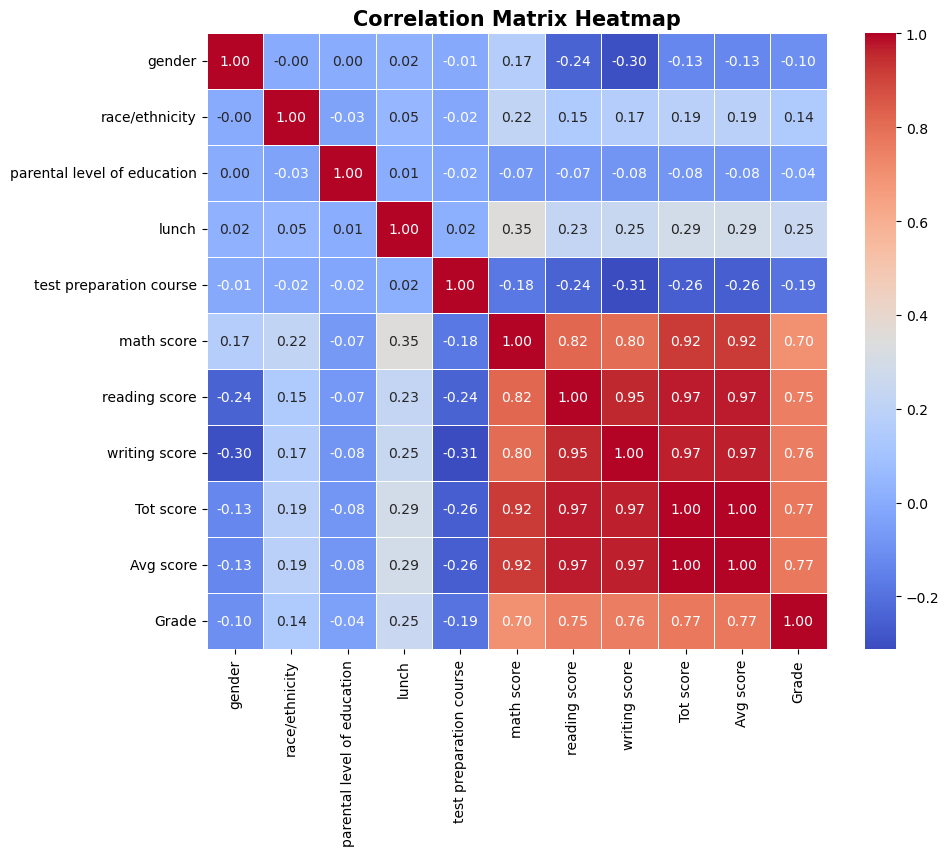

In [156]:
corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=15, fontweight='bold')
plt.show()

In [157]:
labels = df1['Grade']
features = df1.drop(['Grade','Tot score','Avg score'],axis=1)

In [158]:
from sklearn.model_selection import train_test_split 

In [159]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 4)

In [160]:
x_train.shape, x_test.shape

((800, 8), (200, 8))

In [161]:
depths = list(range(1, 11)) 
cv_scores = []

for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i, criterion='entropy',random_state=41)
    scores = cross_val_score(dtc, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_depth = depths[cv_scores.index(max(cv_scores))]
print ("The best depth is therefore",best_depth)

The best depth is therefore 7


In [162]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=41)

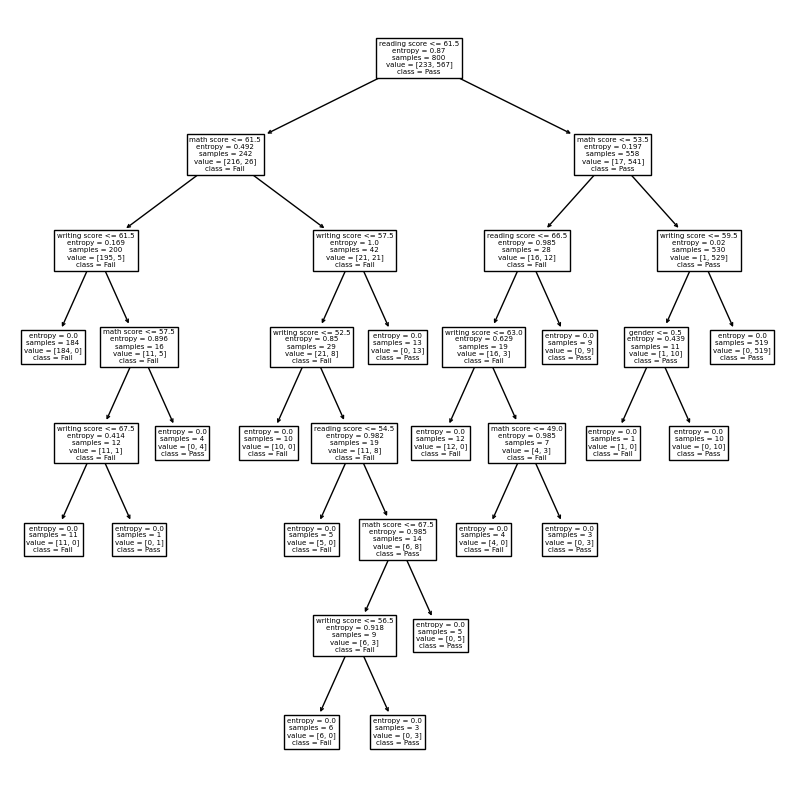

In [163]:
plt.figure(figsize=(10,10 ))
_ = tree.plot_tree(dtc,
                  feature_names=x_train.columns.tolist(),
                  class_names=['Fail','Pass'])

In [164]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dtc.predict(x_test)
dtc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is',dtc_accuracy)
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy is 0.995

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.99      1.00       148

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



Text(0.5, 1.0, 'Confusion Matrix-DTC')

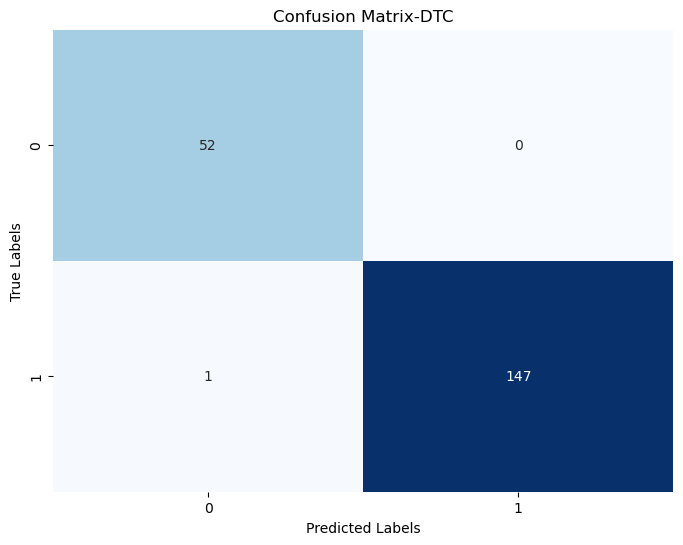

In [165]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-DTC')

In [166]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=29)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is',rfc_accuracy)
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy is 0.985

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.99      0.99       148

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



Text(0.5, 1.0, 'Confusion Matrix-RFC')

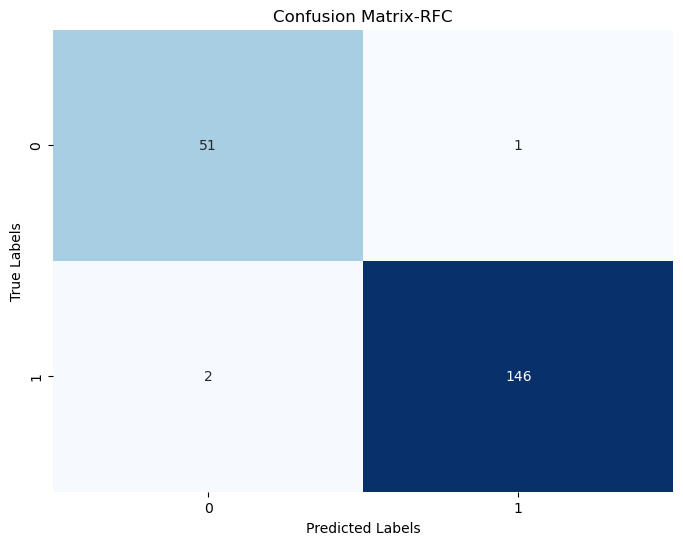

In [167]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-RFC')

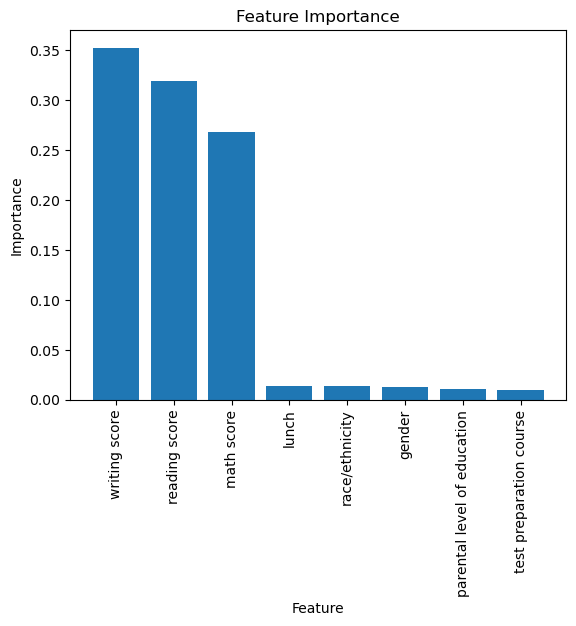

In [168]:

feature_importance = rfc.feature_importances_
feature_names = df1.columns 
sorted_idx = feature_importance.argsort()[::-1]

# Plotting feature importance
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show() 


In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is',lr_accuracy)
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy is 0.985

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.99      0.99      0.99       148

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



Text(0.5, 1.0, 'Confusion Matrix-LR')

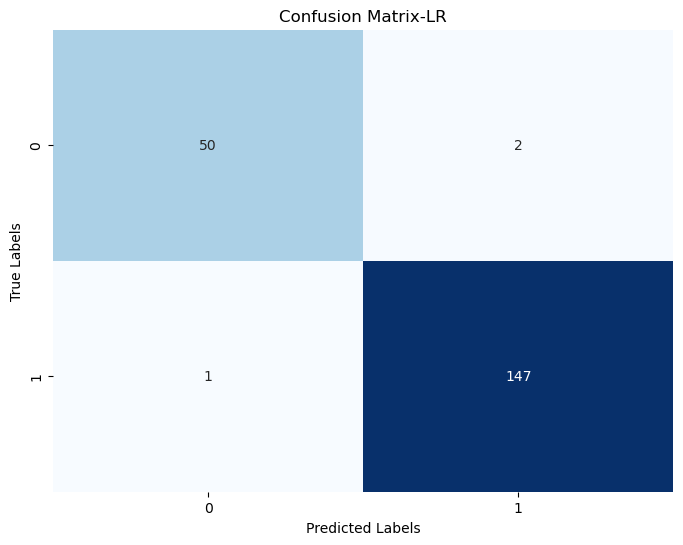

In [170]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-LR')

In [171]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print(xgb_accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

0.995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      1.00       148

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



Text(0.5, 1.0, 'Confusion Matrix-XGboost')

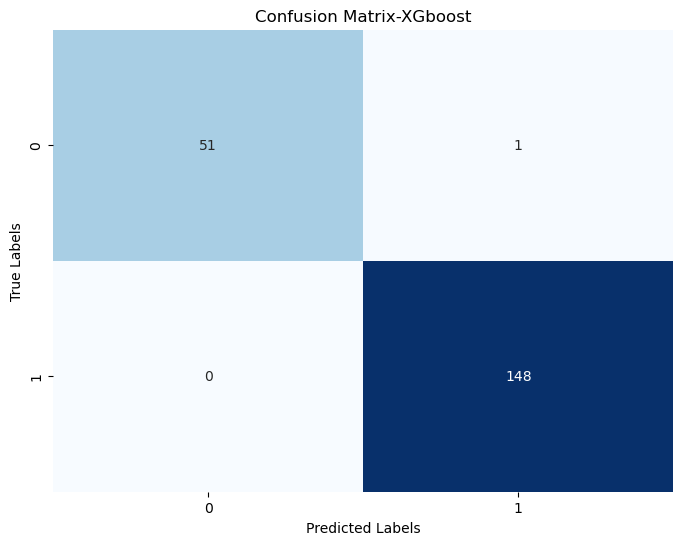

In [172]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-XGboost')

In [173]:
models = pd.DataFrame({
    'Model': ['Xgboost Classifer', 'Logistic Regression', 
              'Decision Tree Classifer', 'Random Forest Classifier'],
    'Accuracy Score': [xgb_accuracy,lr_accuracy,dtc_accuracy,rfc_accuracy]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
0,Xgboost Classifer,0.995
2,Decision Tree Classifer,0.995
1,Logistic Regression,0.985
3,Random Forest Classifier,0.985
